<a href="https://colab.research.google.com/github/NovrianPratama/Learn-DeepLearning/blob/main/Model_Klasifikasi_dua_kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melatih Model dua kelas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


Link dataset:
[Orange vs Grapefruit](https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit)

In [ ]:
# download Dataset
!kaggle datasets download -d joshmcadams/oranges-vs-grapefruit
!unzip /content/oranges-vs-grapefruit.zip

Dataset URL: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit
License(s): CC0-1.0
  0% 0.00/61.2k [00:00<?, ?B/s]
100% 61.2k/61.2k [00:00<00:00, 70.1MB/s]
Archive:  /content/oranges-vs-grapefruit.zip
  inflating: citrus.csv              


## Preprocessing Dataset

In [ ]:
df = pd.read_csv('/content/citrus.csv')
print(df.head())
print('\n', df.info())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB

 None


In [ ]:
print(f'Cek Missing Value:\n {df.isna().sum()}')
print(f'\nCek data duplicated:\n {df.duplicated().sum()}')

Cek Missing Value:
 name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Cek data duplicated:
 0


In [ ]:
df['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


In [ ]:
# Mengubah data menjadi numerical
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
print(df.sample(4))
print(f'\n {df.info()}')

      name  diameter  weight  red  green  blue
2711     1      8.61  154.46  156     90     2
8548     0     12.16  207.91  155     86    15
9435     0     12.99  220.72  159     64    17
3391     1      9.05  161.49  159     76     8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB

 None


In [ ]:
df['name'].value_counts()

,count
name,
1,5000
0,5000


In [ ]:
# Memisahkan data training dan testing
X = df.drop('name', axis=1)
y = df['name']

print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')
X.head()

Shape X: (10000, 5)
Shape y: (10000,)


,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [ ]:
# Normalisasi data training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

## Membagi Data training dan testing

In [ ]:
# Membagi data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (7000, 5)
Shape X_test: (3000, 5)
Shape y_train: (7000,)
Shape y_test: (3000,)


## Building Model

In [ ]:
# Import libarary model deep
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Untuk model yang kita kembangkan adalah model sequential yang memiliki 3 buah layer seperti di bawah. Activation function pada 2 layer pertama yang dapat digunakan adalah relu untuk latihan ini. Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari model neural network kita merupakan satu buah bilangan numerik. Activation function pada layer terakhir dipilih sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1. Sigmoid sangat cocok digunakan pada masalah klasifikasi biner.

Untuk optimizer menggunakan stochastic gradient descent (SGD) yang merupakan optimizer yang sangat umum dan cocok digunakan pada dataset yang berukuran kecil. Lalu, untuk loss yang sesuai adalah ‘binary_crossentropy’ karena masalah adalah 2 kelas (biner). Selain itu jika ingin menampilkan akurasi pada setiap proses pelatihan model, kita dapat menambahkan parameter metrics dan mengisinya dengan string ‘accuracy’.

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

memulai tahapan pelatihan model neural network dengan menjalankan fungsi .fit() seperti kode berikut.

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9277 - loss: 0.1925
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.1920
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9269 - loss: 0.1943
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.1938
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2026
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9262 - loss: 0.1904
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.1929
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.1949
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.1944
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9272 - loss: 0.1928
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.1922
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Mengevaluasi dengan data baru
model.evaluate(X_test, y_test, batch_size=1)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9286 - loss: 0.1764


[0.17973384261131287, 0.9279999732971191]

# Melatih Model Multi Class

In [ ]:
df_multi = pd.read_csv('/content/Iris.csv')
df_multi.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Cek missing value dan duplicate
print(df_multi.info())
print(f'\nCek missing value:\n {df_multi.isna().sum()}')
print(f'\nCek duplicated:\n {df_multi.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Cek missing value:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Cek duplicated:
 0


In [ ]:
# Drop id pada dataset
df_multi = df_multi.drop('Id', axis=1)
df_multi.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
df_multi['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# encode menggunakan one-hot encoding
category = pd.get_dummies(df_multi.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_df = pd.concat([df_multi, category], axis=1)
new_df.drop(columns='Species', inplace=True)
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# Memishakan data training dan testing
X_multi = dataset[:, 0:4]
y_multi = dataset[:, 4:7]

In [ ]:
X_multi_scaled = scaler.fit_transform(X_multi)
X_multi_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [58]:
# Membagi dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_scaled, y_multi, test_size=0.3, random_state=42)
print(f'Shape X_train_multi: {X_train_multi.shape}')
print(f'Shape X_test_multi: {X_test_multi.shape}')

Shape X_train_multi: (105, 4)
Shape X_test_multi: (45, 4)


## Builiding model multi kelas

In [63]:
model_multi = Sequential([
    Dense(32, activation='relu', input_shape=(4,)), # input shape yaitu jumlah fitur
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') # softmax digunakan untuk output multi kelas dan jumlah kelasnya 3
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_multi.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Categorical Crossentropy digunakan untuk multi kelas

In [64]:
hist = model_multi.fit(X_train_multi, y_train_multi, epochs=100) # menyimpan hasil training model dalam hist

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3535 - loss: 1.0815
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4932 - loss: 1.0606
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0393 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5927 - loss: 1.0340
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6094 - loss: 1.0151
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6292 - loss: 0.9988 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6761 - loss: 0.9584 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6552 - loss: 0.9565
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6396 - loss: 0.9468
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6115 - loss: 0.9334
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6715 - loss: 0.9153 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6611 - lo

In [65]:
model_multi.evaluate(X_test_multi, y_test_multi, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1565


[0.1222628504037857, 0.9777777791023254]

## Visualisasi Model

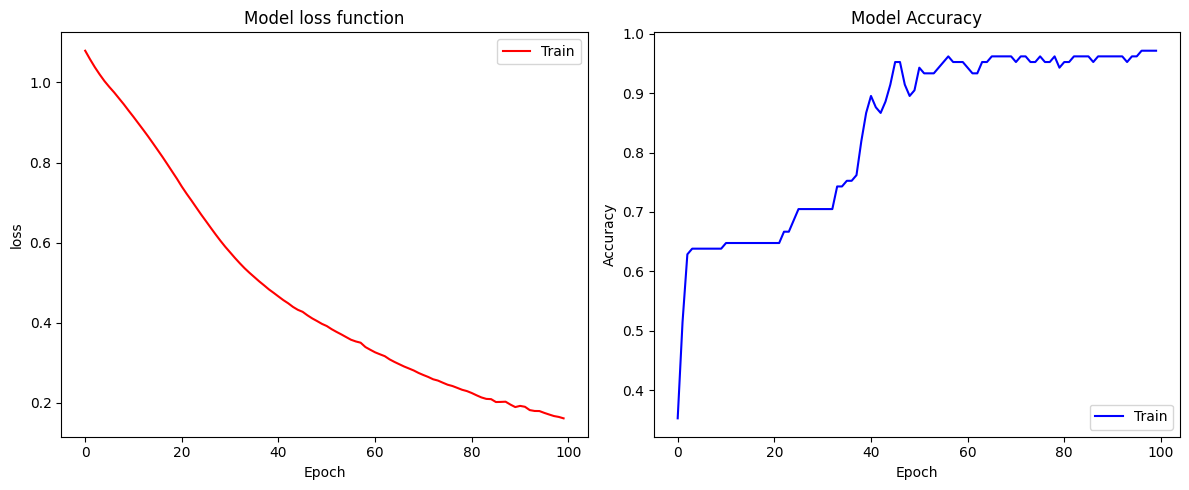

In [68]:
# Membuat visualisasi dalam satu plot
fig, ax = plt.subplots(1,2 , figsize=(12, 5))

# plot loss
ax[0].plot(hist.history['loss'], label='loss', color='red')
ax[0].set_title('Model loss function')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('loss')
ax[0].legend(['Train'], loc='upper right')

# plot accuracy
ax[1].plot(hist.history['accuracy'],label='accuracy', color='blue')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['Train'], loc='lower right')

plt.tight_layout()
plt.show()

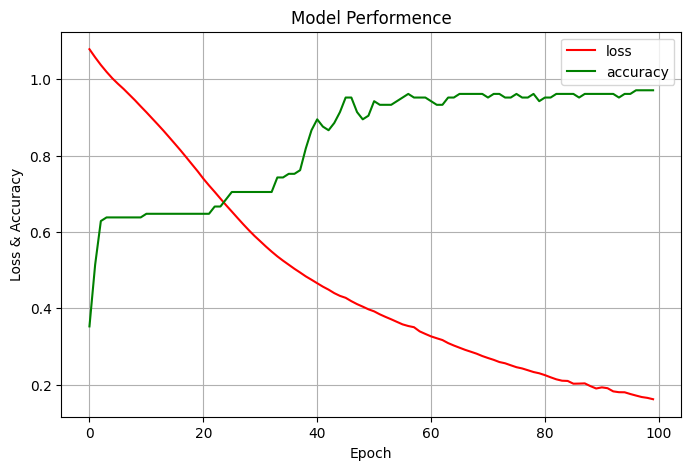

In [70]:
# Menggabungkan visualisasi loss dan accuracy
plt.figure(figsize=(8,5))

plt.plot(hist.history['loss'], label='loss', color='red')
plt.plot(hist.history['accuracy'], label='accuracy', color='green')

plt.title('Model Performence')
plt.xlabel('Epoch')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.grid(True)
plt.show()